In [113]:
%matplotlib inline
from __future__ import print_function
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.4)

In [115]:
data=pd.read_csv("../python practise/FundsReport.csv")[1:]

In [123]:
data.tail()

,pet_id,shelter_name,shelter_state,amount,method,new_donor,donor_source
7315,943277.0,True & Faithful Pet Rescue Mission,3,1980.0,2,0,9
7316,879936.0,Heidi's Legacy Dog Rescue,3,2000.0,5,0,12
7317,823830.0,Collar of Hope,1,2000.0,5,0,12
7318,707410.0,German Shepherd Rescue Of Orange County,1,2000.0,4,0,12
7319,962290.0,Animal Ark Rescue,3,3000.0,2,1,12


In [129]:
data.describe()

C:\Users\Akash Agte\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pet_id,shelter_state,amount,method,new_donor,donor_source
count,7.317000e+03,7319.000000,7319.000000,7319.000000,7319.000000,7319.000000
mean,6.069890e+05,2.462905,41.614678,5.360842,0.530400,11.328733
std,3.349931e+05,1.106620,92.906801,1.577376,0.499109,2.134039
min,1.919000e+03,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,1.000000,10.000000,5.000000,0.000000,12.000000
50%,NaN,3.000000,20.000000,5.000000,1.000000,12.000000
75%,NaN,3.000000,50.000000,6.000000,1.000000,12.000000
max,1.150926e+06,5.000000,3000.000000,8.000000,1.000000,12.000000


In [118]:
feature_cols=['shelter_state','method','donor_source']

In [119]:
X=data[feature_cols]
y=data.new_donor

In [120]:
print (X_train.shape)
print (y_train.shape)
print (y_test.shape)

(4391, 3)
(4391,)
(2928,)


In [124]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print (logreg.intercept_)
print (logreg.coef_)

[ 0.27986602]
[[-0.18864269 -0.06598229  0.0567113 ]]


In [125]:
y_pred=logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test,y_pred))

0.556352459016


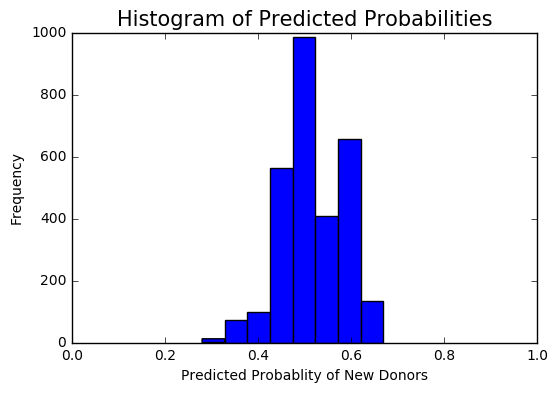

In [130]:
y_pred_prob=logreg.predict_proba(X_test)[:,1]
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.ylim(0,1000)
plt.title('Histogram of Predicted Probabilities',size=15)
plt.xlabel('Predicted Probablity of New Donors')
plt.ylabel('Frequency')

In [131]:
confusion=metrics.confusion_matrix(y_test,y_pred)
print (confusion)

[[ 551  801]
 [ 498 1078]]
